In [1]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy
from cascade import Cascade

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pd.set_option('display.max_colwidth', -1)
cas = Cascade()

In [3]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [4]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [6]:
a = hexagon_data.retweetCount.unique()
a.sort()
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  24,  25,  26,  27,
        29,  30,  31,  33,  34,  38,  43,  44,  48,  70, 106, 182, 229,
       781])

In [7]:
## looking at the cascade 229 (juul)
juul_cascade = hexagon_data.loc[hexagon_data.retweetCount == 229]

In [8]:
source_node = juul_cascade.head(1).userID.values[0]

In [9]:
users = list(juul_cascade.userID.unique())
users.remove(source_node)

In [25]:
G, first_nodes = cas.create_cascade_lvl_1(source_node,users,hexagon_data)



  0%|          | 0/165 [00:00<?, ?it/s]

  1%|          | 1/165 [00:00<01:04,  2.56it/s]

  1%|          | 2/165 [00:00<00:58,  2.80it/s]

  2%|▏         | 3/165 [00:00<00:54,  3.00it/s]

  2%|▏         | 4/165 [00:01<00:50,  3.16it/s]

  3%|▎         | 5/165 [00:01<00:48,  3.29it/s]

  4%|▎         | 6/165 [00:01<00:46,  3.38it/s]

  4%|▍         | 7/165 [00:02<00:46,  3.37it/s]

  5%|▍         | 8/165 [00:02<00:46,  3.40it/s]

  5%|▌         | 9/165 [00:02<00:44,  3.50it/s]

  6%|▌         | 10/165 [00:02<00:43,  3.53it/s]

  7%|▋         | 11/165 [00:03<00:43,  3.56it/s]

  7%|▋         | 12/165 [00:03<00:47,  3.20it/s]

  8%|▊         | 13/165 [00:03<00:46,  3.30it/s]

  8%|▊         | 14/165 [00:04<00:44,  3.39it/s]

  9%|▉         | 15/165 [00:04<00:43,  3.42it/s]

 10%|▉         | 16/165 [06:12<4:34:56, 110.72s/it]

 10%|█         | 17/165 [06:13<3:11:24, 77.60s/it] 

 11%|█         | 18/165 [06:13<2:13:16, 54.40s/it]

 12%|█▏        | 19/165 [06:13<1:32:52, 38.16s/it]

 12%|█

 88%|████████▊ | 145/165 [06:49<00:05,  3.34it/s]

 88%|████████▊ | 146/165 [06:50<00:05,  3.31it/s]

 89%|████████▉ | 147/165 [06:50<00:05,  3.34it/s]

 90%|████████▉ | 148/165 [06:50<00:05,  3.24it/s]

 90%|█████████ | 149/165 [06:51<00:04,  3.28it/s]

 91%|█████████ | 150/165 [06:51<00:04,  3.36it/s]

 92%|█████████▏| 151/165 [06:51<00:04,  3.42it/s]

 92%|█████████▏| 152/165 [06:51<00:03,  3.44it/s]

 93%|█████████▎| 153/165 [06:52<00:03,  3.41it/s]

 93%|█████████▎| 154/165 [06:52<00:03,  3.48it/s]

 94%|█████████▍| 155/165 [06:52<00:02,  3.55it/s]

 95%|█████████▍| 156/165 [06:53<00:02,  3.54it/s]

 95%|█████████▌| 157/165 [06:53<00:02,  3.58it/s]

 96%|█████████▌| 158/165 [06:53<00:01,  3.59it/s]

 96%|█████████▋| 159/165 [06:53<00:01,  3.55it/s]

 97%|█████████▋| 160/165 [06:54<00:01,  3.59it/s]

 98%|█████████▊| 161/165 [06:54<00:01,  3.52it/s]

 98%|█████████▊| 162/165 [06:54<00:00,  3.55it/s]

 99%|█████████▉| 163/165 [06:54<00:00,  3.57it/s]

 99%|█████████▉| 164/165 [06:55

In [63]:
G = cas.get_node_attributes(G,users,hexagon_data,1,source_node=source_node)

In [127]:
rem_users = set(user_list) - set(first_nodes)
G, second_user, rem_users = cas.create_cascade(G,first_nodes,rem_users)





  0%|          | 0/2 [00:00<?, ?it/s]

finding connection for following network might take some time







 50%|█████     | 1/2 [00:00<00:00,  2.78it/s]



100%|██████████| 2/2 [00:00<00:00,  2.85it/s]







  0%|          | 0/2 [00:00<?, ?it/s]

finding connection for followers network might take some time







 50%|█████     | 1/2 [00:00<00:00,  3.64it/s]



100%|██████████| 2/2 [00:00<00:00,  3.49it/s]







  0%|          | 0/2 [00:00<?, ?it/s]



 50%|█████     | 1/2 [00:00<00:00,  4.70it/s]



100%|██████████| 2/2 [00:00<00:00,  4.69it/s]





In [129]:
G3, third_users, rem_users1 = cas.create_cascade(G,second_user,rem_users)





  0%|          | 0/5 [00:00<?, ?it/s]

finding connection for following network might take some time







 20%|██        | 1/5 [00:00<00:01,  2.29it/s]



 40%|████      | 2/5 [00:00<00:01,  2.60it/s]



 60%|██████    | 3/5 [12:30<07:30, 225.12s/it]



 80%|████████  | 4/5 [12:30<02:37, 157.69s/it]



100%|██████████| 5/5 [12:31<00:00, 110.65s/it]







  0%|          | 0/5 [00:00<?, ?it/s]

finding connection for followers network might take some time







 20%|██        | 1/5 [00:00<00:01,  3.76it/s]



 40%|████      | 2/5 [00:00<00:00,  3.65it/s]



 60%|██████    | 3/5 [00:00<00:00,  3.65it/s]



 80%|████████  | 4/5 [00:01<00:00,  3.65it/s]



100%|██████████| 5/5 [00:01<00:00,  3.53it/s]







  0%|          | 0/5 [00:00<?, ?it/s]



 20%|██        | 1/5 [00:00<00:00,  4.42it/s]



 40%|████      | 2/5 [00:00<00:00,  4.71it/s]



 60%|██████    | 3/5 [00:00<00:00,  4.97it/s]



 80%|████████  | 4/5 [00:00<00:00,  5.16it/s]



100%|██████████| 5/5 [00:00<00:00,  5.35it/s]





In [ ]:
G = cas.get_node_attributes(G,first_nodes,hexagon_data,1)
G = cas.get_node_attributes(G,second_user,hexagon_data,2)

In [132]:
G = cas.get_node_attributes(G,third_users,hexagon_data,3)

In [165]:
shells =  [third_users] + [[source_node]] + [first_nodes] + [second_user] 
pos = nx.shell_layout(G,shells)

In [167]:
## for shells
color_map = list()
for (node) in G.nodes():
    if node == source_node:
        color_map.append("yellow")
    else:
        if node in set(second_user):
            color_map.append("green")
        elif node in set(first_nodes):
            color_map.append("blue")
        elif node in set(third_users):
            color_map.append("red")

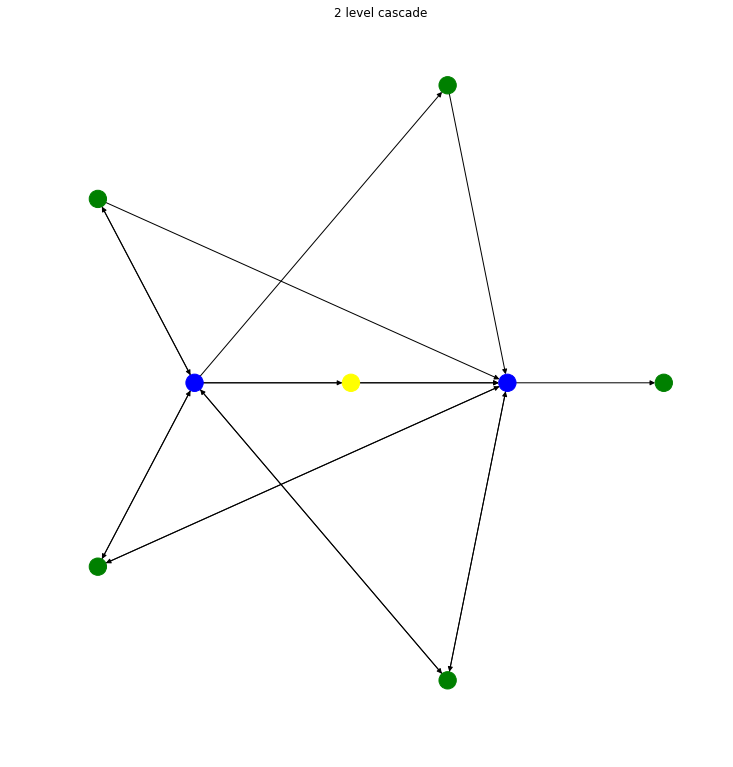

In [123]:
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw(G,nodelist=pos.keys(),pos=pos,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

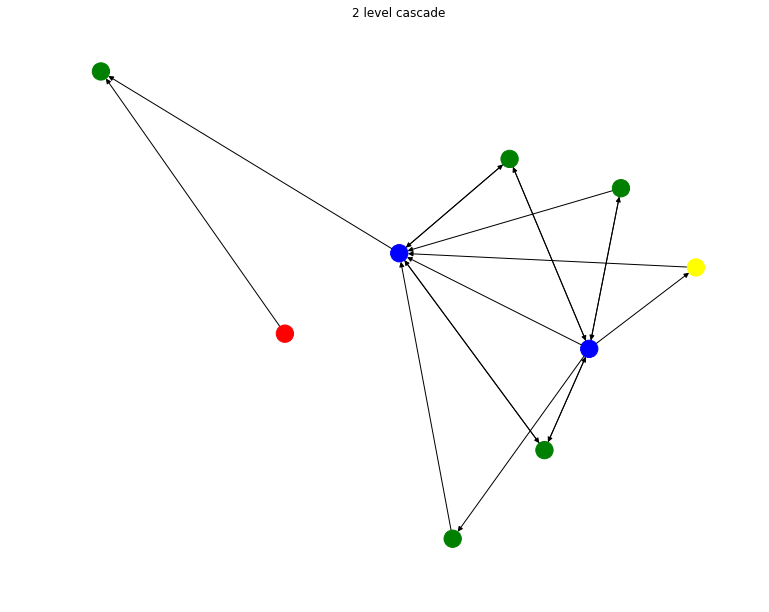

In [170]:
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw(G,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

## dump the graph

In [171]:
# gpickle the graph
nx.write_gpickle(G,"/Users/akshayuppal/Desktop/thesis/twitter_juul/models/juul_cascade.gpickle")